In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     ---------------------------------------- 0.1/8.1 MB 1.1 MB/s eta 0:00:08
      --------------------------------------- 0.2/8.1 MB 1.9 MB/s eta 0:00:05
     -- ------------------------------------- 0.4/8.1 MB 3.4 MB/s eta 0:00:03
     ---- ----------------------------------- 0.8/8.1 MB 4.6 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/8.1 MB 5.8 MB/s eta 0:00:02
     ------- -------------------------------- 1.6/8.1 MB 6.3 MB/s eta 0:00:02
     ---------- ----------------------------- 2.2/8.1 MB 7.2 MB/s eta 0:00:01
     ----------- ---------------------------- 2.4/8.1 MB 6.8 MB/s eta 0:00:01
     -------------- ------------------------- 2.8/8.1 MB 7.2 MB/s eta 0:00:01
     ----------------- ---------------------- 3.4/8.1 MB 7.8 MB/s eta 0:00:01
     ------------------ --------------------- 3.7/8.1 MB 8.0 M


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install pandas

     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/11.6 MB 1.3 MB/s eta 0:00:09
     ---------------------------------------- 0.1/11.6 MB 1.5 MB/s eta 0:00:08
      --------------------------------------- 0.2/11.6 MB 2.1 MB/s eta 0:00:06
     - -------------------------------------- 0.4/11.6 MB 2.3 MB/s eta 0:00:05
     - -------------------------------------- 0.5/11.6 MB 2.3 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/11.6 MB 2.4 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/11.6 MB 2.7 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/11.6 MB 2.9 MB/s eta 0:00:04
     --- ------------------------------------ 1.2/11.6 MB 2.9 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/11.6 MB 3.0 MB/s eta 0:00:04
     ----- ---------------------------------- 1.5/11.6 MB 3.2 MB/s eta 0:00:04
     ----- ---------------------------------- 1.7/11.6 MB 3


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
# 📦 Step 0: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [17]:
# ⚙️ Step 1: Load the Dataset
file_path = r"A:\THENMOZHI\vscode\individual+household+electric+power+consumption\household_power_consumption.txt"
df = pd.read_csv(file_path, sep=';', low_memory=False)

In [18]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [19]:
# 🧼 Step 2: Data Preprocessing

# Replace '?' with NaN and drop missing
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert data types
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[numeric_cols] = df[numeric_cols].astype(float)

# Convert Date and Time
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d/%m/%Y %H:%M:%S")

# Extract new time-based features
df['hour'] = df['Datetime'].dt.hour
df['day'] = df['Datetime'].dt.day
df['month'] = df['Datetime'].dt.month
df['weekday'] = df['Datetime'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Drop original Date, Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Create additional feature: Total sub metering
df['Total_sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
 8   hour                   int32         
 9   day                    int32         
 10  month                  int32         
 11  weekday                int32         
 12  is_weekend             int64         
 13  Total_sub_metering     float64       
dtypes: datetime64[ns](1), float64(8), int32(4), int64(1)
memory usage: 203.3 MB


In [21]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
hour                     0
day                      0
month                    0
weekday                  0
is_weekend               0
Total_sub_metering       0
dtype: int64

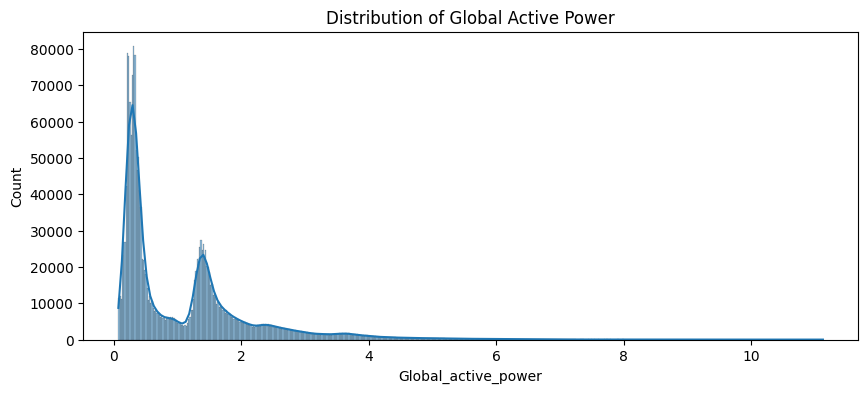

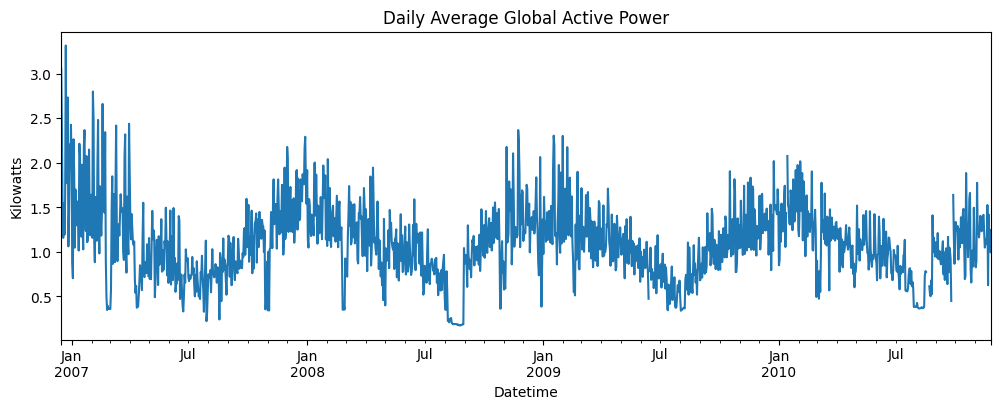

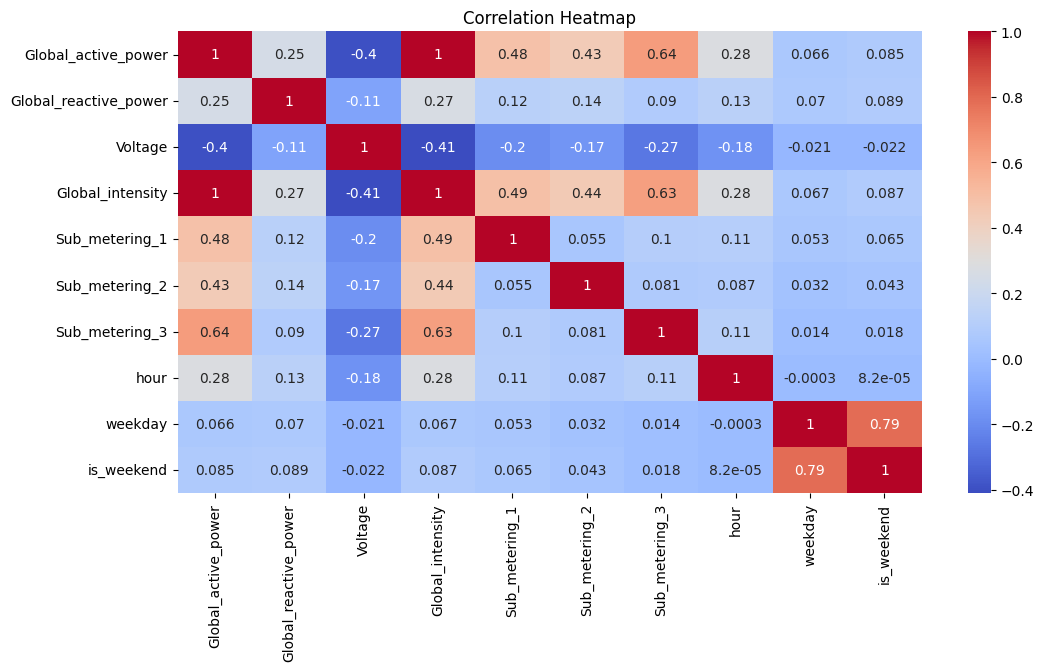

In [40]:
# 📊 Step 2.5: EDA (Exploratory Data Analysis)
plt.figure(figsize=(10, 4))
sns.histplot(df['Global_active_power'], kde=True)
plt.title("Distribution of Global Active Power")
plt.show()

plt.figure(figsize=(12, 4))
df.set_index('Datetime')['Global_active_power'].resample('D').mean().plot()
plt.title("Daily Average Global Active Power")
plt.ylabel("Kilowatts")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df[numeric_cols + ['hour', 'weekday', 'is_weekend']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 🎯 Step 3: Define Features and Target
X = df.drop(['Global_active_power', 'Datetime'], axis=1)#independent column
y = df['Global_active_power']#target or dependent column

In [34]:
# 🔀 Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# 🤖 Step 5: Train Models

# Linear Regression (no tuning needed)
lr = LinearRegression()
lr.fit(X_train, y_train)

# 🔧 Faster Hyperparameter Tuning: Random Forest with RandomizedSearchCV
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}
rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=rf_params,
    n_iter=4,            # number of parameter settings sampled, fewer than grid search
    cv=3,
    n_jobs=-1,
    random_state=42
)
rf_random.fit(X_train, y_train)
rf = rf_random.best_estimator_
print("Best Random Forest Params:", rf_random.best_params_)

# 🔧 Faster Hyperparameter Tuning: Gradient Boosting with RandomizedSearchCV
gb_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
gb_random = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42), 
    param_distributions=gb_params,
    n_iter=4,
    cv=3,
    n_jobs=-1,
    random_state=42
)
gb_random.fit(X_train, y_train)
gb = gb_random.best_estimator_
print("Best Gradient Boosting Params:", gb_random.best_params_)

c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\

Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}
Best Gradient Boosting Params: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


In [37]:
y_train.isnull().sum()

np.int64(0)

In [38]:
# 📊 Step 6: Model Evaluation
def evaluate(model, name):
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²:", r2_score(y_test, y_pred))
    return y_pred

y_pred_lr = evaluate(lr, "Linear Regression")
y_pred_rf = evaluate(rf, "Random Forest")
y_pred_gb = evaluate(gb, "Gradient Boosting")




Linear Regression Performance:
MAE: 0.02574837914812594
RMSE: 0.04025082180298187
R²: 0.9985585319174043

Random Forest Performance:
MAE: 0.020141155401335115
RMSE: 0.03432102714504504
R²: 0.9989519642906877

Gradient Boosting Performance:
MAE: 0.01835416475884228
RMSE: 0.03043018480360717
R²: 0.9991761185841768


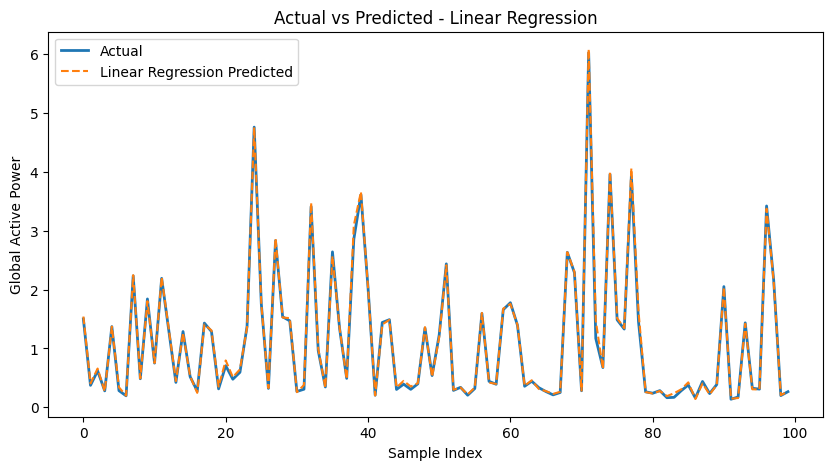

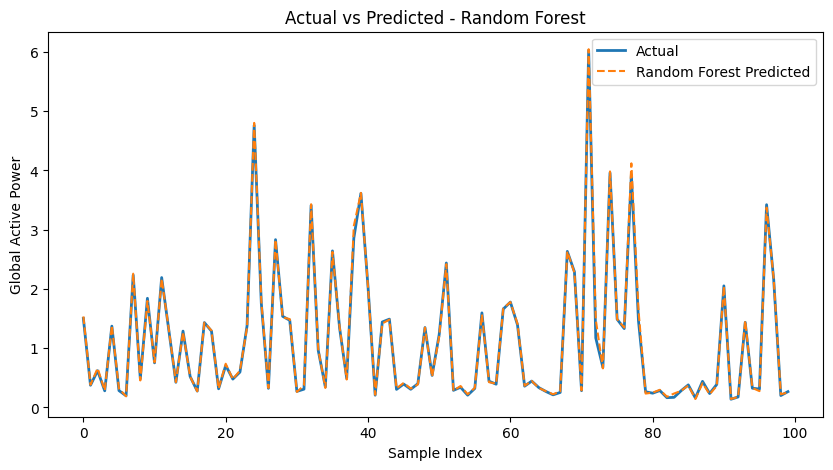

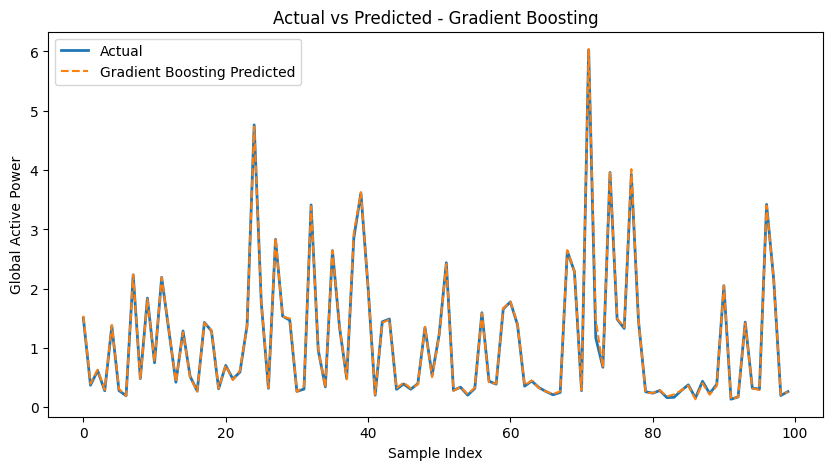

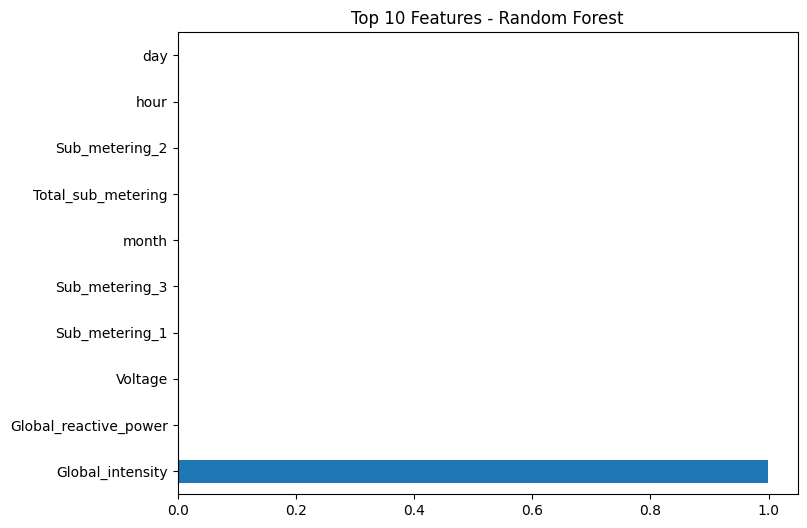

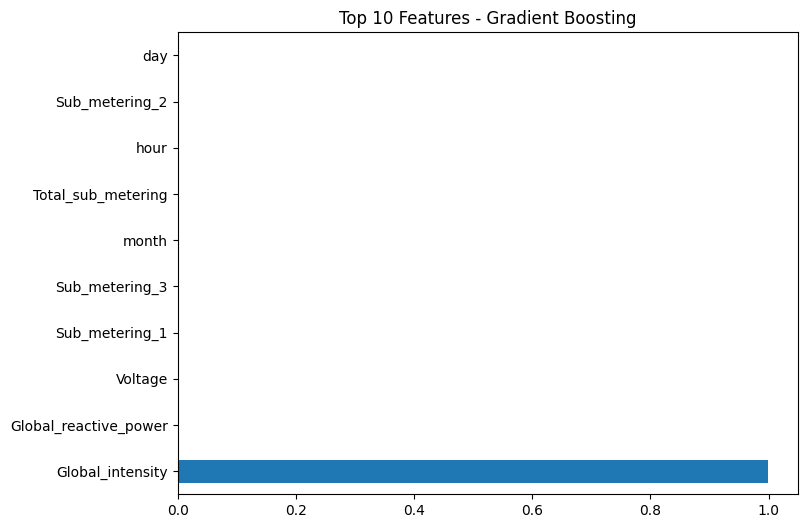

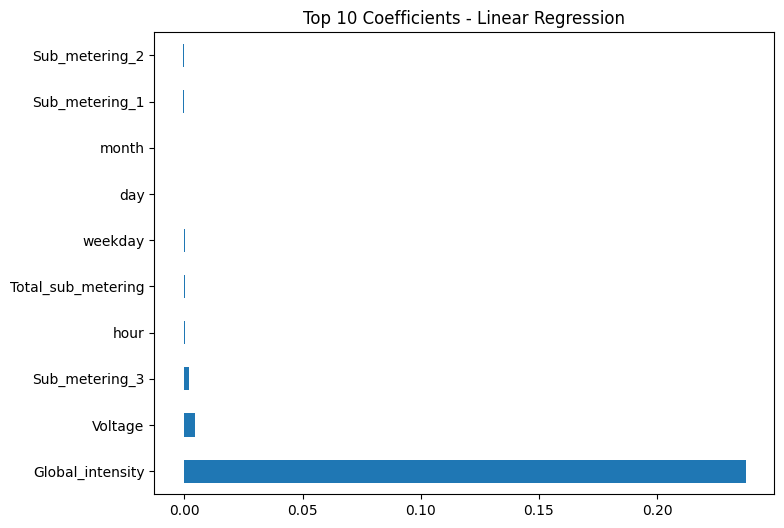

In [43]:
# 📈 Step 7: Visualizations (Improved - Separate Plots)

# 🔹 Actual vs Predicted - Linear Regression
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(y_pred_lr[:100], label='Linear Regression Predicted', linestyle='--')
plt.title("Actual vs Predicted - Linear Regression")
plt.xlabel("Sample Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.show()

# 🔹 Actual vs Predicted - Random Forest
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(y_pred_rf[:100], label='Random Forest Predicted', linestyle='--')
plt.title("Actual vs Predicted - Random Forest")
plt.xlabel("Sample Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.show()

# 🔹 Actual vs Predicted - Gradient Boosting
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(y_pred_gb[:100], label='Gradient Boosting Predicted', linestyle='--')
plt.title("Actual vs Predicted - Gradient Boosting")
plt.xlabel("Sample Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.show()

# 📌 Feature Importance - Random Forest
feature_imp_rf = pd.Series(rf.feature_importances_, index=X.columns)
feature_imp_rf.nlargest(10).plot(kind='barh', title="Top 10 Features - Random Forest", figsize=(8, 6))
plt.show()

# 📌 Feature Importance - Gradient Boosting
feature_imp_gb = pd.Series(gb.feature_importances_, index=X.columns)
feature_imp_gb.nlargest(10).plot(kind='barh', title="Top 10 Features - Gradient Boosting", figsize=(8, 6))
plt.show()

# 📌 Coefficient Plot - Linear Regression
coef_lr = pd.Series(lr.coef_, index=X.columns)
coef_lr.nlargest(10).plot(kind='barh', title="Top 10 Coefficients - Linear Regression", figsize=(8, 6))
plt.show()